In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

fake_df = pd.read_csv('data/urls_fake.csv')
real_df = pd.read_csv('data/urls_real.csv')

fake_df

In [ ]:
from src.helpers import videos_to_frames

videos_to_frames(
    vid_path="data/vids/real_vids",
    frame_path="data/frames/real",
    frame_gap=10,
)

In [1]:
from src.helpers import load_frames
df = load_frames("data/frames/fake")

  0%|          | 0/147 [00:10<?, ?it/s]


<function matplotlib.pyplot.show(close=None, block=None)>

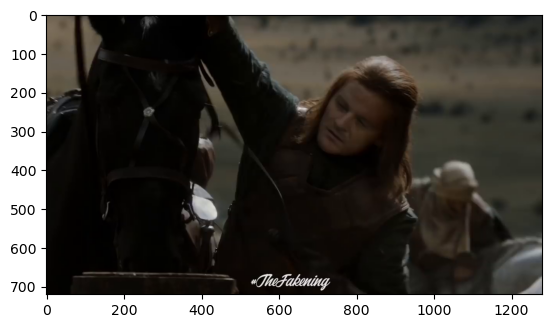

In [2]:
import matplotlib.pyplot as plt
plt.imshow(df[0][0])
plt.show

Found 664 files.
Using 532 files for training.
Using 132 files for validation.


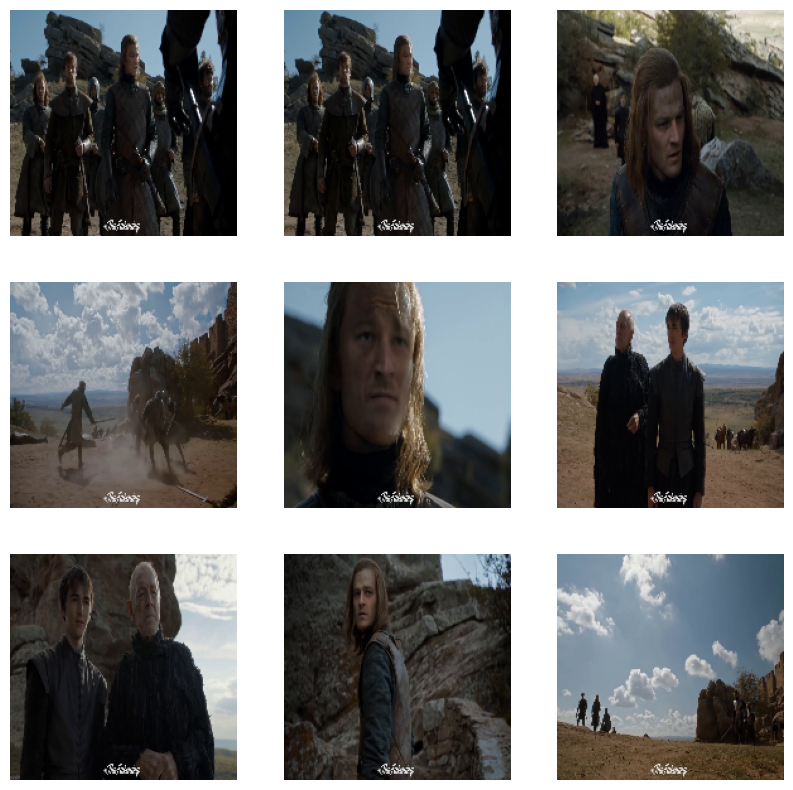

In [6]:
import keras
import matplotlib.pyplot as plt
import numpy as np

image_size = (180, 180)
batch_size = 128

train_ds, val_ds = keras.utils.image_dataset_from_directory(
    directory="data/frames/fake/A Young Sean Bean as Young Ned Stark in Game of Thrones Deepfake",
    labels=None,
    validation_split=0.2,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

plt.figure(figsize=(10, 10))
for images in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.axis("off")